# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [2]:
NAME = "Piotr Cięgotura, Wojciech Sutowicz, Brunon Kania, Filip Magnowski"
COLLABORATORS = ""

---

## Zestaw zadań 3: Badanie intensywności procesów punktowych (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [5]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
#raise NotImplementedError()

### Przygotowanie danych
Wczytaj dane zawarte w plikach CSV załączonych do zestawu zadań.

In [2]:
# YOUR CODE HERE
#raise NotImplementedError()
I=pd.read_csv("points_1.csv")
II=pd.read_csv("points_2.csv")
III=pd.read_csv("points_3.csv")
def point_count_on_subregions(points, bins, x_lim, y_lim):
    
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    
    # YOUR CODE HERE
    
    histogram=np.histogram2d(points["X"], points["Y"], bins=bins, range=[x_lim, y_lim])
    bin_data=np.transpose(histogram[0])
    return bin_data
d1=point_count_on_subregions(I,[10,10],[0,20],[0,10])
d2=point_count_on_subregions(II,[10,10],[0,20],[0,10])
d3=point_count_on_subregions(III,[10,10],[0,20],[0,10])

### Zadanie 1: Test chi-kwadrat Pearsona (30 pkt)

Przygotuj funkcję `pearsons_chi2_test()`, która będzie przeprowadzać test istotności chi-kwadrat Pearsona i wyświetlać jego wynik zgodnie z pokazanym poniżej schematem. Następnie wykorzystaj przygotowanią funkcję do sprawdzenia, czy rozkłady punktowe zaimportowane z plików points_1.csv i points_2.csv są jednorodnymi rozkładami Poissona o intensywności równej 20. W obliczeniach przyjmij $\alpha=0.05$.

Rozwiązanie zadania wymaga dodatkowo przygotowania funkcji pomocniczych `distribution_table()` i `poisson_distribution_table()`, które będą przygotowywać szeregi rodzielcze testowanego rozkładu oraz teoretycznego rozkładu Poissona.

Algorytm postępowania:
- Formułujemy hipotezę zerową i hipotezę alternatywną H1: <br/>
H0: Testowana zmienna ma przyjęty rozkład teoretyczny <br/>
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
- Obliczamy wartość statystyki testowej $\chi^2$: <br/>
$\chi^2 = \sum_{i=1}^{k} \frac{(n_i-n p_i)^2}{np_i}$ <br/>
gdzie: $k$ - liczba wariantów badanej cechy, $n_i$ - liczebność i-tego wariantu testowanego rozkładu, $n$ - liczba punktów testowanego rozkładu, $p_i$ - prawdopodobieństwo  i-tego wariantu rozkładu teoretycznego.
- Z rozkładu chi-kwadrat wyznaczamy obszar krytyczny testu istotności $\chi^2_{\alpha}$: <br/>
$\chi^2_{\alpha} = \chi^2_{1-\alpha, k-s-1}$ <br/>
gdzie:  $\alpha$ - poziom istotności, $k$ - liczba wariantów rozkładu, $s$ - liczba nieznanych parametrów rozkładu.
- Podejmujemy decyzję weryfikującą: <br/>
$\chi^2 >= \chi^2_{\alpha}$ - Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = X <br/>
$\chi^2 < \chi^2_{\alpha}$ - Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = X

Przykładowe wyniki pracy funkcji `pearsons_chi2_test()`: <br/>
<br/>
`Test chi-kwadrat Pearsona` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`chi2 = 23.307 chi2_alpha = 18.078`<br/>
`chi2 >= chi2_alpha` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05` <br/>
<br/>
`Test chi-kwadrat Pearsona` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`chi2 = 19.521 chi2_alpha = 21.129`<br/>
`chi2 < chi2_alpha` <br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05` <br/>

#### a) Przygotowanie funkcji

In [7]:
import math
def distribution_table(bin_counts):
    """
    Parameters
    -------
    bin_counts: array
        Macierz 2D z liczbą punków przypisanych do każdego z podobszarów.

    Returns
    -------
    table: DataFrame
        Tablica zawierająca 2 kolumny:
        - "K", która zawiera wszystkie wartości całkowite z zakresu od minimalnej do maksymalnej liczby zliczeń w obrębie podobszarów,
        - "N(K)", która zawiera liczby podobszarów, którym zostały przypisane poszczególne liczby punktów.
    """    
    # YOUR CODE HERE minimalna wartosc i maksymalna wartosc w podobszarze, wypisz wszystkie wartosci i dalej ile jest danych zliczen w podobszarze
    #raise NotImplementedError()
    
    
    #K od min do maks sortowanie
    d=bin_counts.flatten() #zamiana maciezy 2D na 1D
    d=np.sort(d) #sortowanie
    d=np.unique(d,return_counts=True) #funkcja zwraca wartosci unikalne i ich liczbe wystompien
    df=pd.DataFrame()
    df['K']=d[0]
    df['N(K)']=d[1]
           
    return df

def wartosc_oczekiwana(tab):
    
    mu=np.average(tab)
    
    return mu

def poisson_distribution_table(k, mu):
    """
    Parameters
    -------
    k: array
        Macierz 1D z wariantami badanej cechy, dla którym ma zostać wyliczone prawdopodobieństwo.
    mu: int
        Wartość oczekiwana rozkładu Poissona.

    Returns
    -------
    table: DataFrame
        Tablica zawierająca 2 kolumny:
        - "K", która zawiera warianty badanej cechy,
        - "P(K)", która zawiera wartości prawdopodobieństw rozkładu Poissona wyliczone dla wartości oczekiwanej mu
        oraz poszczególnych wariantów badanej cechy znormalizowane do sumy wartości równej 1.
    """  
    # YOUR CODE HERE tu wychodzi szereg rozdzielczy z prawdopodobienstwami 
    ar=0 # tu będę liczył wartości P(K)
    for i in range(0,len(k)):
        tmp=(mu**k[i]*2.718281828459045**(-k[i]))/math.factorial(int(k[i]))
        ar = np.append(ar, tmp)   #obliczenie prawdopodobienstwa
        
    ar = np.delete(ar,0)
    
    df=pd.DataFrame()
    df['K']=k
    df['P(K)']=ar
           
    return df

def pearsons_chi2_test(tested_distribution, theoretical_distribution, alpha, ddof):
    """
    Parameters
    -------
    tested_distribution: DataFrame
        Tablica opisująca testowany rozkład i zawierająca 2 kolumny:
        - "K", która zawiera warianty badanej cechy, wartości muszą być identycznej jak kolumna "K" zmiennej lokalnej theoretical_distribution,
        - "N(K)", która zawiera liczebności poszczególnych wariantów badanej cechy.

    theoretical_distribution: DataFrame
        Tablica opisująca rozkład teoretyczny i zawierająca 2 kolumny:
        - "K", która zawiera warianty badanej cechy, wartości muszą być identycznej jak kolumna "K" zmiennej lokalnej tested_distribution,
        - "P(K)", która zawiera prawdopodobieństwa poszczególnych wariantów badanej cechy. Wartości z tej kolumny muszą sumować się do 1.
    
    alpha: float
        Wartość z zakresu [0,1] określająca poziom istotności.
    
    ddof: int
        Liczba nieujemna określająca liczbę nieznanych parametrów rozkładu.
    """
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    tmp=0
    n = sum(tested_distribution['N(K)'])
    for i in range(0,len(tested_distribution['K'])): #wartosc statystyki testowej
        tmp = tmp + (tested_distribution['N(K)'][i]-n*theoretical_distribution['P(K)'][i])**2/n*theoretical_distribution['P(K)'][i]
        
    #obszar krytyczny
    
    st_swobody = len(tested_distribution['K'])-1
    from scipy.stats import chi2
    x = np.arange(0, 2*st_swobody, 0.01)

    y=chi2.sf(x, df=st_swobody)
    #print(tmp)
    #print(st_swobody)
    #plt.plot(x, chi2.sf(x, df=st_swobody))
    for i in range(1,len(y)):
        if y[i-1]>=alpha and y[i]<alpha:
            chi_alfa = x[i]
            print(tmp)
            print(y[i])
            print("Test chi-kwadrat Pearsona")
            print("H0: Testowana zmienna ma przyjęty rozkład teoretyczny")
            print("H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego")
            print("chi2: {}".format(tmp))
            print("chi2_alfa: {}".format(chi_alfa))
    
            #if tmp > chi_alfa:
            #    print("chi2 >= chi2_alpha")
            #    print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = {}".format(alpha))
            if tmp < chi_alfa:
                print("chi2 < chi2_alpha")
                print("Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = {}".format(alpha))
            else:
                print("chi2 >= chi2_alpha")
                print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = {}".format(alpha))


#### b) Weryfikacja hipotezy o rozkładzie 1

p_1
26
3.8059217201149396e-05
0.04994673642535339
Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2: 3.8059217201149396e-05
chi2_alfa: 38.89
chi2 < chi2_alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05
p_3
28
1.156881021824591e-06
0.0499695202855991
Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2: 1.156881021824591e-06
chi2_alfa: 41.34
chi2 < chi2_alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05


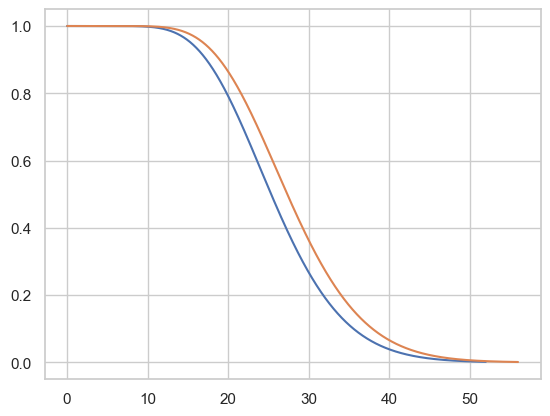

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
   
#points_1
print("p_1")
p=distribution_table(d1)
pp=poisson_distribution_table(p['K'],20)
pearsons_chi2_test(p,pp,0.05,1)

#points_3
print("p_3")
e=distribution_table(d3)
ee=poisson_distribution_table(e['K'],20)
pearsons_chi2_test(e,ee,0.05,1)

#### c) Weryfikacja hipotezy o rozkładzie 2

p_2
38
4354.914290689345
0.049939004821059875
Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2: 4354.914290689345
chi2_alfa: 53.39
chi2 >= chi2_alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05


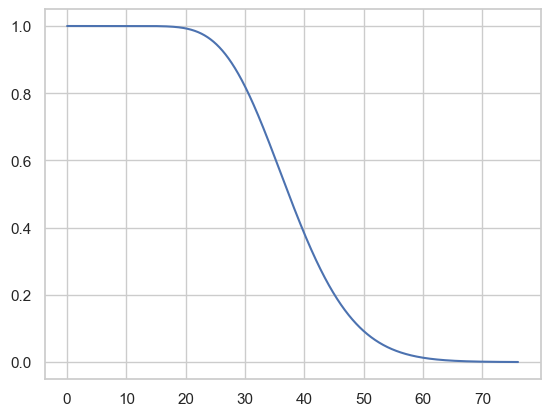

In [9]:
# YOUR CODE HERE
#points_2
print("p_2")
o=distribution_table(d2)
oo=poisson_distribution_table(o['K'],20)
pearsons_chi2_test(o,oo,0.05,1)
# raise NotImplementedError()

### Zadanie 2: Test Kołmogorowa - Smirnowa (20 pkt)

Przygotuj funkcję `kolmogorow_smirnow_test()`, która będzie przeprowadzać test istotności Kołmogorowa-Smirnowa i wyświetlać jego wynik zgodnie z pokazanym poniżej schematem. Następnie wykorzystaj przygotowanią funkcję do sprawdzenia, czy rozkład punktowy zaimportowany z pliku points_3.csv jest jednorodnym rozkładem Poissona. W obliczeniach przyjmij poziom istotności $\alpha=0.05$.

Algorytm postępowania:
- Formułujemy hipotezę zerową i hipotezę alternatywną H1: <br/>
H0: Testowana zmienna ma przyjęty rozkład teoretyczny <br/>
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
- Obliczamy wartość statystyki testowej $\lambda$: <br/>
$D = \sup_{x}(|F_t - F_0|)$ <br/>
$\lambda = D\sqrt{n}$ <br/>
gdzie: $F_t$ - dystrybuanta testowanego rozkładu,  $F_0$ - dystrybuanta rozkładu teoretycznego, $n$ - liczba punktów.
- Z rozkładu Kołomogorowa wyznaczamy obszar krytyczny testu istotności $\lambda_{\alpha}$: <br/>
$\lambda_{\alpha} = \lambda_{1-\alpha}$ <br/>
gdzie:  $\alpha$ - poziom istotności.
- Podejmujemy decyzję weryfikującą: <br/>
$\lambda >= \lambda_{\alpha}$ - Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = X <br/>
$\lambda < \lambda_{\alpha}$ - Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = X

Uwaga! Test należy przeprowadzić niezależnie dla współrzędnej X i Y. Decyzja jest podejmowana na podstawie wyników obu testów.


Przykładowe wyniki pracy funkcji `kolmogorow_smirnow_test()`: <br/>
<br/>
`Test Kołmogorowa-Smirnowa dla współrzędnej X` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`lambda = 2.036  lambda_alpha = 1.255`<br/>
`lambda >= lambda_alpha` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05` <br/>
<br/>
`Test Kołmogorowa-Smirnowa dla współrzędnej Y` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`lambda = 1.136  lambda_alpha = 1.748` <br/>
`lambda < D_alpha` <br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05`

#### a) Przygotowanie funkcji

In [27]:
def kolmogorow_smirnow_test(tested_points, theoretical_points, alpha, ddof):
    """
    Parameters
    -------
    tested_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów testowanego rozkładu opisaną jako "X" lub "Y".

    theoretical_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów toeretycznego rozkładu opisaną jako "X" lub "Y".
    
    alpha: float
        Wartość z zakresu [0,1] określająca poziom istotności.
    
    ddof: int
        Liczba nieujemna określająca liczbę nieznanych parametrów rozkładu.
    """
    # YOUR CODE HERE
    D,_=sp.stats.kstest(tested_points,theoretical_points)
    
    lmbda = D*np.sqrt(len(tested_points))
  
    
    lmbda_alpha = sp.stats.kstwobign.ppf(1-alpha)
    
    print("Test Kołmogorowa-Smirnowa dla współrzędnej {}".format(tested_points.name))
    print("H0: Testowana zmienna ma przyjęty rozkład teoretyczny")
    print("H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego")
    
    print("Lambda wynosi: {}".format(lmbda))
    print("Lambda alpha wynosi: {}".format(lmbda_alpha))
    
    if lmbda >= lmbda_alpha:
        print("lmbda >= lmbda_alpha")
        print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = {}".format(alpha))
    elif lmbda < lmbda_alpha:
        print("lmbda < lmbda_alpha")
        print("Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = {}".format(alpha)) 
    # raise NotImplementedError()

#### b) Weryfikacja hipotezy o rozkładzie 3

In [30]:
# YOUR CODE HERE
cdfx = np.linspace(0, 20, num=len(III))
cdfy = np.linspace(0, 10, num=len(III))
#print(cdf)

kolmogorow_smirnow_test(III['X'], cdfx, 0.05, 0)
kolmogorow_smirnow_test(III['Y'], cdfy, 0.05, 0)
#raise NotImplementedError()

Test Kołmogorowa-Smirnowa dla współrzędnej X
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
Lambda wynosi: 2.155744924824021
Lambda alpha wynosi: 1.3580986393225505
lmbda >= lmbda_alpha
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05
Test Kołmogorowa-Smirnowa dla współrzędnej Y
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
Lambda wynosi: 0.5706383624534173
Lambda alpha wynosi: 1.3580986393225505
lmbda < lmbda_alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = 0.05


i
